**Introduction to the Investment Dataset Project**

# INVESTMENT DATASET

Startup investments play a pivotal role in the ever-evolving entrepreneurial landscape, and our exploration begins with a deep dive into the Startup Investments Crunchbase dataset. Aiming to predit the stage of the startup based on the investments made in it .

## Dataset Overview

**Dataset Link:** [Startup Investments Crunchbase](https://www.kaggle.com/datasets/arindam235/startup-investments-crunchbase)

## Project Phases

### Practical 1: Data Preprocessing and EDA

The initial phase involves meticulous data preparation and exploration. Leveraging Python and libraries like Pandas, Matplotlib, Seaborn, and Scikit-Learn, we undertake tasks such as data cleaning, feature engineering, and exploratory data analysis. Visualization aids unveil critical insights into founding years, funding types, startup statuses, and more.

### Practical 2: Applying Models

In the second practical, we venture into machine learning models for predicting startup success. The dataset undergoes splitting into training and testing sets, and two models take the spotlight:

1. **Decision Tree Classifier:** A robust classification model.
2. **Random Forest Classifier:** An ensemble model enhancing predictive accuracy.

Models are trained, evaluated, and their performance is assessed using accuracy metrics.

### Practical 3: Model Deployment without Pipeline

This section delves into deploying a trained Random Forest model without a pipeline. The process showcases how the model predicts outcomes for new data, offering insights into real-world applications.

### Practical 4: Model Deployment using Pipeline

Enhancing deployment efficiency, the fourth practical introduces a pipeline that incorporates data preprocessing steps. This streamlined approach optimizes the deployment process.

### Practical 5: ML Deployment in Flask

The final phase elevates deployment by integrating the model into a Flask web application. Users can input startup information, and the trained model provides real-time predictions. The user-friendly interface enhances accessibility, making machine learning applications tangible and interactive.

Embark on a comprehensive journey through data preprocessing, model application, and deployment. This project encapsulates the intricacies of startup investments, providing a holistic understanding of the dataset and its practical applications.

<H3>PRACTICAL 1 : DATA PREPROCESSING AND EDA </H3>

In [1]:
import pandas as pd
from sklearn.impute import SimpleImputer
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import pickle
import random
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer

In [2]:
df = pd.read_csv('C:/Users/najaf/Desktop/SEM 5/MD & CM/Investments_VC.csv', encoding="ISO-8859-1")

In [3]:
df.columns

Index(['permalink', 'name', 'homepage_url', 'category_list', ' market ',
       ' funding_total_usd ', 'status', 'country_code', 'state_code', 'region',
       'city', 'funding_rounds', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'difference between ', 'seed', 'venture',
       'equity_crowdfunding', 'undisclosed', 'convertible_note',
       'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
       'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A',
       'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G',
       'round_H'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49434 entries, 0 to 49433
Data columns (total 40 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   permalink             49434 non-null  object 
 1   name                  49433 non-null  object 
 2   homepage_url          45985 non-null  object 
 3   category_list         45473 non-null  object 
 4    market               45466 non-null  object 
 5    funding_total_usd    49434 non-null  object 
 6   status                48120 non-null  object 
 7   country_code          44161 non-null  object 
 8   state_code            30160 non-null  object 
 9   region                44161 non-null  object 
 10  city                  43318 non-null  object 
 11  funding_rounds        49434 non-null  int64  
 12  founded_at            38550 non-null  object 
 13  founded_month         38478 non-null  object 
 14  founded_quarter       38478 non-null  object 
 15  founded_year       

In [5]:
df= df.rename(columns={' market ':"market",' funding_total_usd ':"funding_total_usd"})
df= df.rename(columns={'difference between':"diff_first_n_last"})
df['funding_total_usd'] = df['funding_total_usd'].str.replace(',', '')
df['funding_total_usd'] = df['funding_total_usd'].str.replace(' ', '')
df[['col1', 'col2']] = df['founded_month'].str.split('-', expand=True)
df[['col3', 'col4']] = df['founded_quarter'].str.split('Q', expand=True)
df = df.drop(['col1', 'col3', 'founded_month', 'founded_quarter'], axis=1)
df=df.rename(columns={'col2':'founded_month',"col4":'founded_quarter'})
df['funding_total_usd']=df['funding_total_usd'].str.replace('-','')
df['funding_total_usd'] = pd.to_numeric(df['funding_total_usd'])
df['founded_month'] = pd.to_numeric(df['founded_month'])
df['founded_quarter'] = pd.to_numeric(df['founded_quarter'])
df['market'] = df['market'].astype(str)

In [6]:
((df.isnull().sum()+df.isin([0]).sum())/df.count())*100

permalink                0.000000
name                     0.002023
homepage_url             7.500272
category_list            8.710663
market                   0.000000
funding_total_usd       20.847797
status                   2.730673
country_code            11.940400
state_code              63.905836
region                  11.940400
city                    14.118842
funding_rounds           0.000000
founded_at              28.233463
founded_year            28.473413
first_funding_at         0.000000
last_funding_at          0.000000
difference between      65.216248
seed                    72.003075
venture                 52.912975
equity_crowdfunding     98.944047
undisclosed             98.074200
convertible_note        98.873245
debt_financing          91.453251
angel                   93.670348
grant                   97.689849
private_equity          97.224582
post_ipo_equity         99.360764
post_ipo_debt           99.848283
secondary_market        99.961565
product_crowdf

# EDA

<U>YEAR DISTRIBUTION</U>

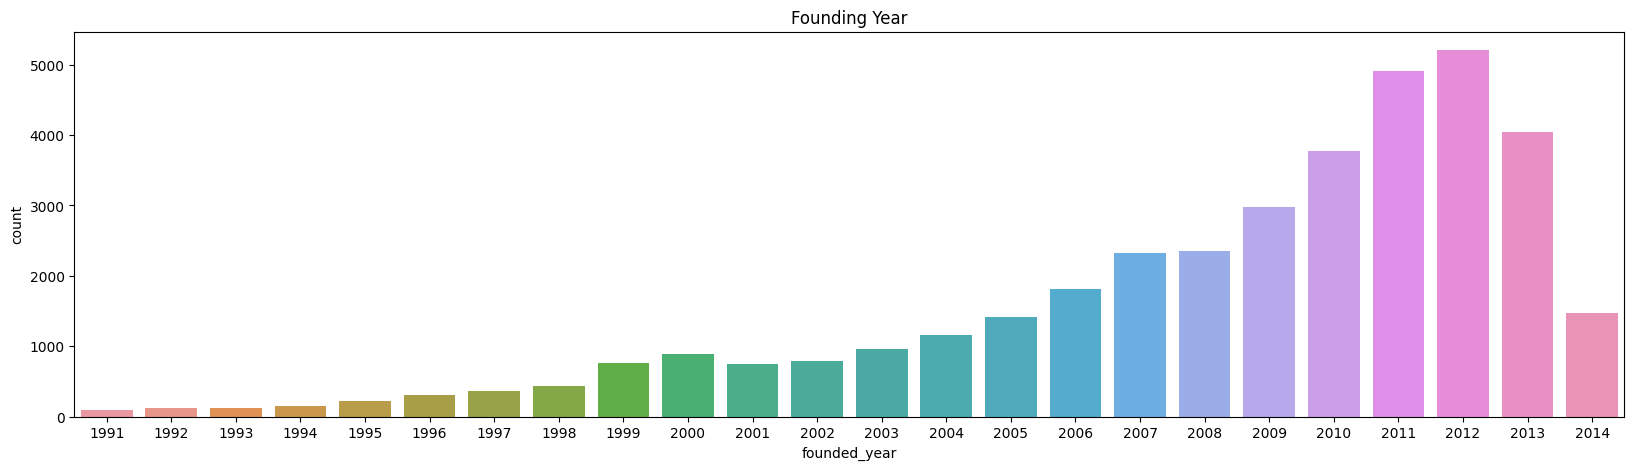

In [7]:
founded_year_df = df[df['founded_year'] > 1990].copy()   # Filtering for companies founded after 1990
founded_year_df['founded_year'] = founded_year_df['founded_year'].astype(int)
fig,axes = plt.subplots(1,1,figsize=(20,5))
sns.countplot(data = founded_year_df, x = founded_year_df.founded_year)
plt.title('Founding Year')
plt.show()

Maximum startups were founded in 2012 

<U> FUNDING TYPE </U>

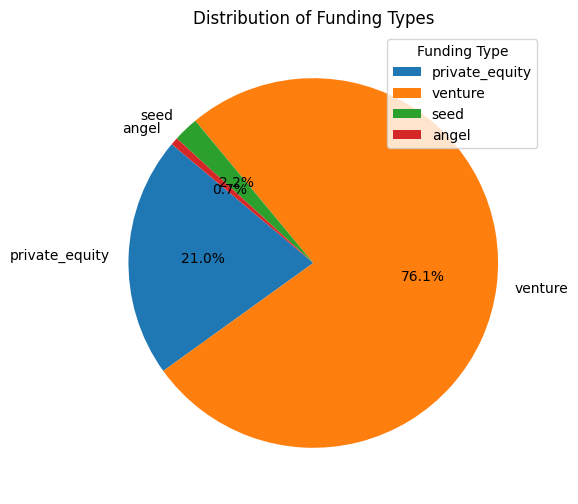

In [8]:
funding_sum = df[['private_equity','venture', 'seed', 'angel']].sum()
plt.figure(figsize=(6,6))
plt.pie(funding_sum, labels=funding_sum.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Funding Types')
plt.legend(title="Funding Type")
plt.show()

In [9]:
df['status'].unique()

array(['acquired', 'operating', nan, 'closed'], dtype=object)

In [10]:
df.groupby('status')['name'].nunique()

status
acquired      3690
closed        2602
operating    41759
Name: name, dtype: int64

In [11]:
df.groupby('status')['funding_total_usd', 'seed', 'venture', 'equity_crowdfunding',
       'undisclosed', 'convertible_note', 'debt_financing',  'grant', 'angel',
       'private_equity', 'post_ipo_equity', 'post_ipo_debt',
       'secondary_market', 'product_crowdfunding', 'round_A', 'round_B',
       'round_C', 'round_D', 'round_E', 'round_F', 'round_G', 'round_H'].mean().T 

C:\Users\najaf\AppData\Local\Temp\ipykernel_7436\1270021297.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('status')['funding_total_usd', 'seed', 'venture', 'equity_crowdfunding',


status,acquired,closed,operating
funding_total_usd,2.381484e+07,8.471443e+06,1.573775e+07
seed,1.784153e+05,1.415031e+05,2.275452e+05
venture,1.385896e+07,5.212253e+06,7.194797e+06
equity_crowdfunding,2.406680e+03,0.000000e+00,6.985484e+03
undisclosed,1.560276e+05,3.732560e+04,1.304258e+05
convertible_note,6.425046e+03,1.012430e+04,2.587998e+04
debt_financing,1.905639e+06,6.263045e+05,1.989590e+06
grant,2.571190e+04,5.857066e+04,1.812118e+05
angel,6.679706e+04,7.328595e+04,6.554783e+04
private_equity,2.633691e+06,5.576029e+05,2.129503e+06


In [12]:
mode_result = df.groupby('status')['funding_rounds'].apply(lambda x: x.mode().iloc[0])
print("mode ",mode_result.T)
df.groupby('status')['funding_rounds'].mean().T

mode  status
acquired     1
closed       1
operating    1
Name: funding_rounds, dtype: int64


status
acquired     2.013817
closed       1.434114
operating    1.689499
Name: funding_rounds, dtype: float64

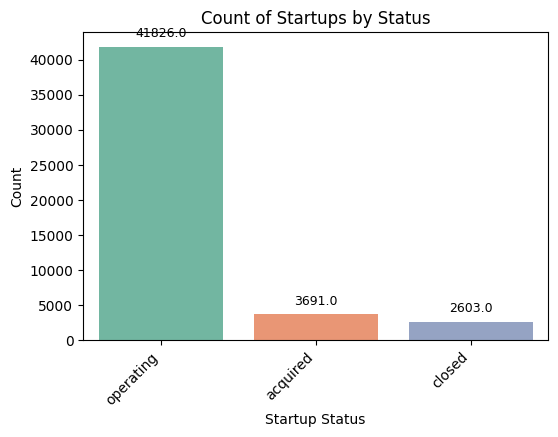

In [13]:
status_counts = df['status'].value_counts()
plt.figure(figsize=(6,4))
ax = sns.barplot(x=status_counts.index, y=status_counts.values, palette='Set2')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Startup Status')
plt.ylabel('Count')
plt.title('Count of Startups by Status')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='bottom', fontsize=9, color='black', xytext=(0, 5), textcoords='offset points')
plt.show()

In [14]:
print("Summary of total funding in startup at different status")
df.groupby('status')['funding_total_usd'].describe()

Summary of total funding in startup at different status


,count,mean,std,min,25%,50%,75%,max
status,,,,,,,,
acquired,3217.0,2.381484e+07,1.153297e+08,1265.0,2500000.0,8371002.0,22500000.00,5.700000e+09
closed,2158.0,8.471443e+06,4.256260e+07,1000.0,175604.0,1000000.0,5382500.00,1.567504e+09
operating,34426.0,1.573775e+07,1.799490e+08,1.0,301019.0,1757977.5,8696679.75,3.007950e+10


<U>FOUNDING MONTH</U>

In [15]:
pivot_df = df.pivot_table(index='founded_month', columns='status', aggfunc='size', fill_value=0)
print("Top 5 months with the most startup founded")
pivot_df.sort_values(by='acquired', ascending=False).head(5)

Top 5 months with the most startup founded


status,acquired,closed,operating
founded_month,,,
1.0,1971,939,18933
6.0,118,119,1398
5.0,113,85,1322
10.0,97,94,1249
4.0,95,99,1315


In [16]:
df.groupby('founded_month')['funding_total_usd'].sum().sort_values(ascending = False).head(5)

founded_month
1.0     3.760421e+11
10.0    4.662186e+10
2.0     1.400080e+10
3.0     1.303024e+10
6.0     1.278080e+10
Name: funding_total_usd, dtype: float64

Most of the startups were founded in January, June , May , October , March . 
Whereas January had the maximum amont of funding in total followed by October , Febuary , March and June .

<u>FOUNDING QUARTER </u>

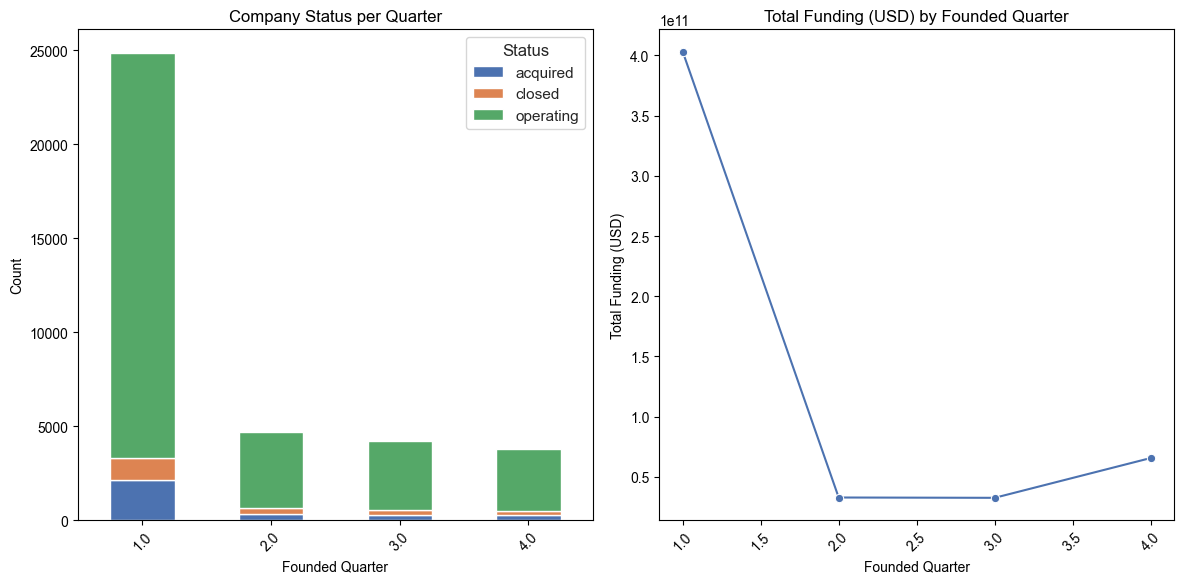

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
pivot_dff = df.pivot_table(index='founded_quarter', columns='status', aggfunc='size', fill_value=0)
top_5 = pivot_dff.sort_values(by='acquired', ascending=False)
sns.set(style='white') 
top_5.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Company Status per Quarter')
axes[0].set_xlabel('Founded Quarter')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title='Status')
quarterly_funding = df.groupby('founded_quarter')['funding_total_usd'].sum()
sns.lineplot(x=quarterly_funding.index, y=quarterly_funding.values, marker='o', color='b', linestyle='-', ax=axes[1])
axes[1].set_title('Total Funding (USD) by Founded Quarter')
axes[1].set_xlabel('Founded Quarter')
axes[1].set_ylabel('Total Funding (USD)')
axes[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

In each quarter , maximum number of startups have operating as their status . While the first quarter received the maximum amount of funding followed by fourth , second and third quarter

<U> COUNTRY WISE </U>

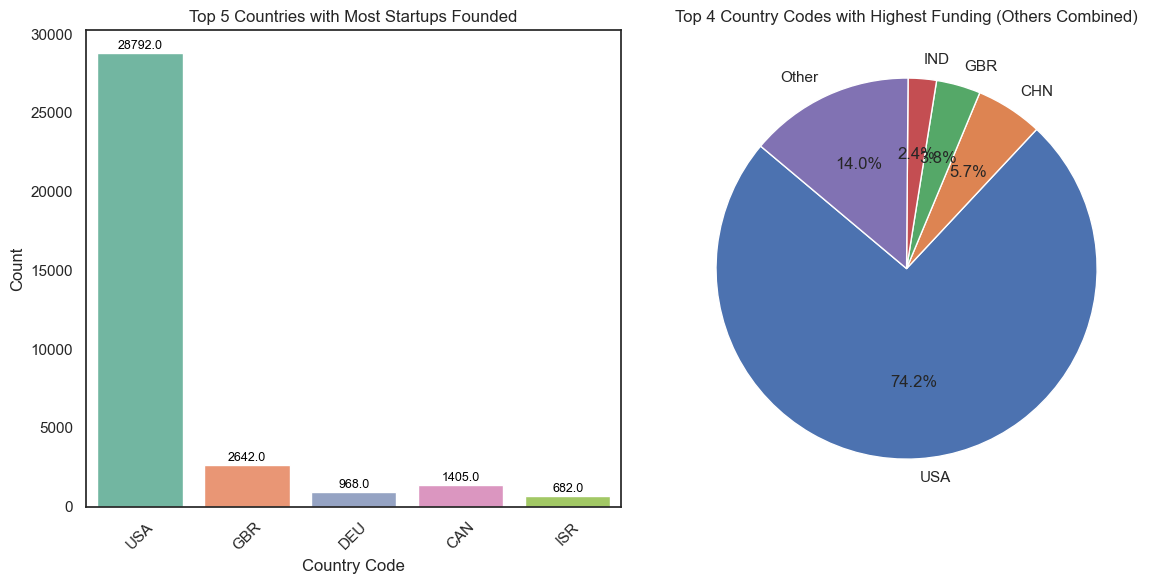

country_code
USA    4.642268e+11
CHN    3.557720e+10
GBR    2.349814e+10
IND    1.501171e+10
CAN    1.391417e+10
Name: funding_total_usd, dtype: float64


In [18]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
pivot_df1 = df.pivot_table(index='country_code', columns='status', aggfunc='size', fill_value=0).sort_values(by='acquired', ascending=False).head(5)
sns.set_style('whitegrid')  # Remove grid lines
ax1 = sns.countplot(data=df[df['country_code'].isin(pivot_df1.index)], x='country_code', palette='Set2', ax=axes[0])
axes[0].set_title('Top 5 Countries with Most Startups Founded')
axes[0].set_xlabel('Country Code')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)
for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=9, color='black', xytext=(0, 5), textcoords='offset points')
top_country_codes = df.groupby('country_code')['funding_total_usd'].sum().sort_values(ascending=False).head(4)
other_funding = df.groupby('country_code')['funding_total_usd'].sum().sort_values(ascending=False).tail(-4).sum()
country_codes = top_country_codes.index.tolist()
funding_values = top_country_codes.values.tolist() + [other_funding]
country_codes.append("Other")
plt.subplot(1, 2, 2)  
plt.pie(funding_values, labels=country_codes, autopct='%1.1f%%', startangle=140)
plt.title('Top 4 Country Codes with Highest Funding (Others Combined)')
plt.tight_layout()
plt.show()
print(df.groupby('country_code')['funding_total_usd'].sum().sort_values(ascending=False).head(5))

USA tops the list of statups founded followed by Great Britain , Canada , Germany , Israel. Whereas in terms of total funding USA reamins at the top followed by China , Great Britain , India and Canada 

<u> MARKET </u>

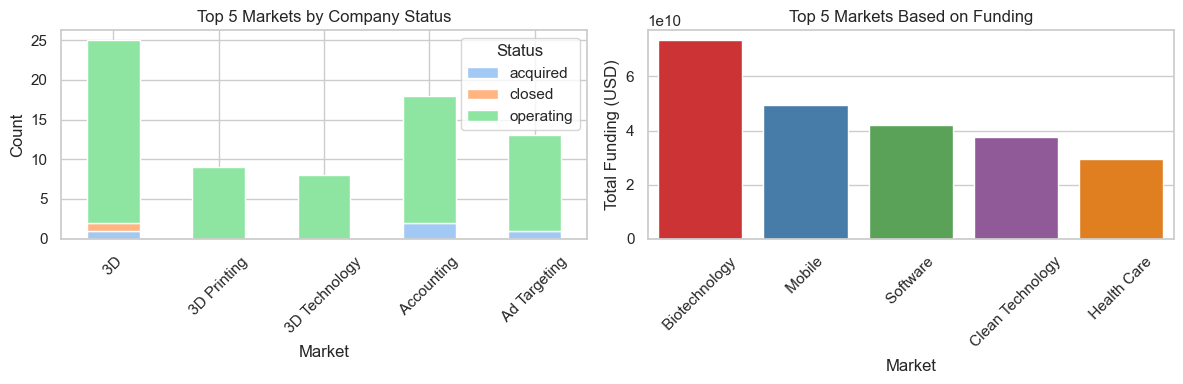

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sorted_pivot_df1 = df.pivot_table(index='market', columns='status', aggfunc='size', fill_value=0).head(5)
sns.set_palette("pastel")
sorted_pivot_df1.plot(kind='bar', stacked=True, ax=axes[0])
axes[0].set_title('Top 5 Markets by Company Status')
axes[0].set_xlabel('Market')
axes[0].set_ylabel('Count')
axes[0].tick_params(axis='x', rotation=45)
axes[0].legend(title='Status', loc='upper right')
top_markets = df.groupby('market')['funding_total_usd'].sum().sort_values(ascending=False).head(5)
sns.barplot(x=top_markets.index, y=top_markets.values, palette='Set1', ax=axes[1])
axes[1].set_title('Top 5 Markets Based on Funding')
axes[1].set_xlabel('Market')
axes[1].set_ylabel('Total Funding (USD)')
axes[1].tick_params(axis='x', rotation=45)
plt.tight_layout()
plt.show()

3D market is at the first spot in terms of market while Biotechnology have the largest market in terms of total funding

<U> REGION </U>

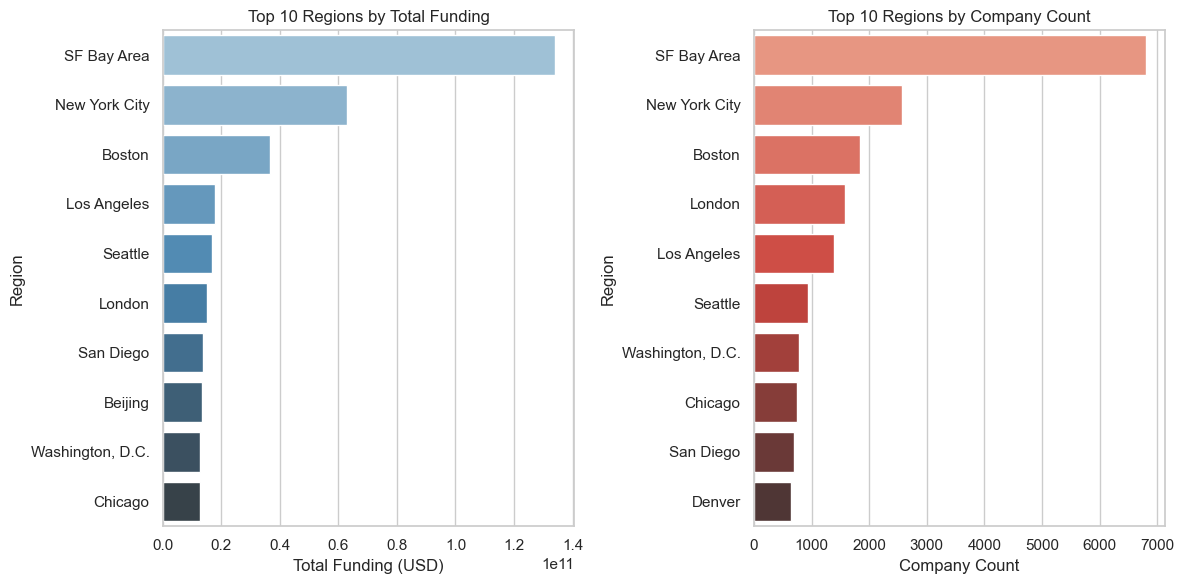

In [20]:
region_funding_total = df.groupby('region')['funding_total_usd'].sum().reset_index()
region_funding_total_sorted = region_funding_total.sort_values(by='funding_total_usd', ascending=False)
region_counts = df['region'].value_counts().reset_index()
region_counts.columns = ['Region', 'Count']
region_counts = region_counts.sort_values(by='Count', ascending=False)
top_n = 10 
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
sns.set(style='whitegrid') 
ax1 = sns.barplot(data=region_funding_total_sorted.head(top_n), x='funding_total_usd', y='region', palette='Blues_d')
plt.title(f'Top {top_n} Regions by Total Funding')
plt.xlabel('Total Funding (USD)')
plt.ylabel('Region')
plt.subplot(1, 2, 2)
sns.set(style='whitegrid')  
ax2 = sns.barplot(data=region_counts.head(top_n), x='Count', y='Region', palette='Reds_d')
plt.title(f'Top {top_n} Regions by Company Count')
plt.xlabel('Company Count')
plt.ylabel('Region')
plt.tight_layout()  
plt.show()

# FEATURE ENGINEERING

In [21]:
df['Total_Investment']=df['seed']+df['venture']+df['equity_crowdfunding']+df['undisclosed']+df['convertible_note']+df['debt_financing']+df['angel']+df['grant']+df['private_equity']+df['post_ipo_equity']+df['post_ipo_debt']+df['secondary_market']+df['product_crowdfunding']+df['round_A']+df['round_B']+df['round_C']+df['round_D']+df['round_E']+df['round_F']+df['round_G']+df['round_H']
df['Funding_amount_left']=df['Total_Investment']-df['funding_total_usd']

In [22]:
df_copy = df.copy()

In [23]:
combined_percentage = ((df_copy.isnull().sum() + df_copy.isin([0]).sum()) / df_copy.count()) * 100
filtered_columns = combined_percentage[combined_percentage >= 90]
filtered_columns.index

Index(['equity_crowdfunding', 'undisclosed', 'convertible_note',
       'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
       'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_C',
       'round_D', 'round_E', 'round_F', 'round_G', 'round_H'],
      dtype='object')

In [24]:
dff=df_copy.drop(columns=['permalink', 'name', 'homepage_url', 'category_list', 'market','state_code', 'region',
       'city', 'founded_at', 'founded_month',
       'founded_quarter', 'founded_year', 'first_funding_at',
       'last_funding_at', 'seed', 'venture',
       'equity_crowdfunding', 'undisclosed', 'convertible_note',
       'debt_financing', 'angel', 'grant', 'private_equity', 'post_ipo_equity',
       'post_ipo_debt', 'secondary_market', 'product_crowdfunding', 'round_A',
       'round_B', 'round_C', 'round_D', 'round_E', 'round_F', 'round_G',
       'round_H'])
dff.columns

Index(['funding_total_usd', 'status', 'country_code', 'funding_rounds',
       'difference between ', 'Total_Investment', 'Funding_amount_left'],
      dtype='object')

In [25]:
count_nan_status = dff['status'].isna().sum()
print("Number of rows with 'NaN' values in 'status' column:", count_nan_status)

Number of rows with 'NaN' values in 'status' column: 1314


In [26]:
df.shape

(49434, 42)

In [27]:
dff = dff.dropna(subset=['status'])
label_encoder = LabelEncoder()
dff['status'] = label_encoder.fit_transform(dff['status'])
# Decode and print each unique encoded value
unique_encoded_values = dff['status'].unique()
for encoded_value in unique_encoded_values:
    original_value = label_encoder.inverse_transform([encoded_value])
    print(f"Encoded Value {encoded_value} stands for: {original_value[0]}")

Encoded Value 0 stands for: acquired
Encoded Value 2 stands for: operating
Encoded Value 1 stands for: closed


In [28]:
dff.shape

(48120, 7)

In [29]:
dff1 = dff.copy()

In [30]:
((dff.isnull().sum())/dff.count())*100

funding_total_usd      20.901485
status                  0.000000
country_code           11.769215
funding_rounds          0.000000
difference between      0.000000
Total_Investment        0.000000
Funding_amount_left    20.901485
dtype: float64

In [31]:
X = dff.drop('status', axis = 1) #dropping status and setting features
Y = dff.status #setting Y variable

In [32]:
label_encoder = LabelEncoder()
categorical_columns = X.select_dtypes(include=['object']).columns
for column in categorical_columns:
    X[column] = label_encoder.fit_transform(X[column])
imputer = SimpleImputer(strategy='constant', fill_value=0)
X= imputer.fit_transform(X)

# PRACTICAL 2 : APPLYING MODELS 

In [33]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 42)#test
# #checking size of each dataset
print('Shape of X_train=>',X_train.shape)
print('Shape of X_test=>',X_test.shape)
print('Shape of Y_train=>',Y_train.shape)
print('Shape of Y_test=>',Y_test.shape)

Shape of X_train=> (38496, 6)
Shape of X_test=> (9624, 6)
Shape of Y_train=> (38496,)
Shape of Y_test=> (9624,)


In [34]:
clf = DecisionTreeClassifier(random_state = 100) 
clf = clf.fit(X_train, Y_train)
preds = clf.predict(X_test) 
print(accuracy_score(Y_test,preds))
print(accuracy_score(Y_train,clf.predict(X_train)))
print('\nDecisionTreeClassification Report\n')
report = classification_report(Y_test, preds)
print(report)

0.8069409808811305
0.9419679966749792

DecisionTreeClassification Report

              precision    recall  f1-score   support

           0       0.13      0.09      0.11       741
           1       0.07      0.03      0.05       545
           2       0.87      0.92      0.89      8338

    accuracy                           0.81      9624
   macro avg       0.36      0.35      0.35      9624
weighted avg       0.77      0.81      0.79      9624



In [35]:
rfc = RandomForestClassifier(n_estimators = 1000, random_state = 42)
rfc.fit(X_train, Y_train)#training the model
pred = rfc.predict(X_test)
print(accuracy_score(Y_test,pred))
print(accuracy_score(Y_train,rfc.predict(X_train)))

print('\nRandom Forest Classification Report\n')
report1 = classification_report(Y_test, pred)
print(report1)

0.8497506234413965
0.9419679966749792

Random Forest Classification Report

              precision    recall  f1-score   support

           0       0.16      0.03      0.05       741
           1       0.03      0.00      0.01       545
           2       0.87      0.98      0.92      8338

    accuracy                           0.85      9624
   macro avg       0.35      0.34      0.33      9624
weighted avg       0.76      0.85      0.80      9624



In [36]:
# model creation
X1 = dff1.drop('status', axis = 1) #dropping status and setting features
Y1 = dff1.status #setting Y variable

In [37]:
X1_train, X1_test, Y1_train, Y1_test = train_test_split(X1, Y1, test_size = 0.2, random_state = 42)#test

In [38]:
label_encoder = LabelEncoder()
categorical_columns = X1_train.select_dtypes(include=['object']).columns
for column in categorical_columns:
    X1_train[column] = label_encoder.fit_transform(X1_train[column])
imputer = SimpleImputer(strategy='constant', fill_value=0)
X1_train= imputer.fit_transform(X1_train)

In [39]:
def train_my_model(X, Y):
    rfc = RandomForestClassifier(n_estimators = 1000, random_state = 42)
    rfc.fit(X, Y)
    return rfc

In [40]:
trained_model = train_my_model(X1_train, Y1_train)
with open('trained_modell.pkl', 'wb') as model_file:
    pickle.dump(trained_model, model_file)

In [41]:
def preprocess_dataframe(df):
    import pandas as pd
    from sklearn.preprocessing import LabelEncoder
    from sklearn.impute import SimpleImputer
    label_encoder = LabelEncoder()
    categorical_columns = df.select_dtypes(include=['object']).columns
    for column in categorical_columns:
        df[column] = label_encoder.fit_transform(df[column])
    imputer = SimpleImputer(strategy='constant', fill_value=0)
    df = imputer.fit_transform(df)
    return df

In [42]:
with open('preprocessed_dataa.pkl', 'wb') as file:
    pickle.dump(preprocess_dataframe, file)

# PRACTICAL 3 : MODEL DEPLOYMENT WITHOUT PIPELINE

In [43]:
with open('trained_modell.pkl', 'rb') as model_file:
    trained_model = pickle.load(model_file)
with open('preprocessed_dataa.pkl', 'rb') as data_file:
    processed_data = pickle.load(data_file)

In [44]:
data = {
    'funding_total_usd': [1000000, 2000000, 1500000],
    'country_code': ['USA', 'IND', 'CAN'],
    'funding_rounds': [5, 3, 4],
    'difference_between': [500000, 300000, 600000],
    'Total_Investment': [3000000, 2500000, 2000000],
    'Funding_amount_left': [2000000, 2200000, 1400000]
}
data=pd.DataFrame(data)

In [45]:
X_test_preprocessed = preprocess_dataframe(data)

In [46]:
predictions = trained_model.predict(X_test_preprocessed)
predictions
# 0 :acquired, 2 :operating, 1 :closed

array([2, 2, 2])

# PRACTICAL 4: MODEL DEPLOYMENT USING PIPELINE

In [47]:
from sklearn.preprocessing import StandardScaler, LabelEncoder, FunctionTransformer

def preprocess(X):
    categorical_columns = X.select_dtypes(include=[np.object]).columns
    label_encoders = {}
    for column in categorical_columns:
        label_encoders[column] = LabelEncoder()
        X[column] = label_encoders[column].fit_transform(X[column])
    numeric_transformer = Pipeline(steps=[
        ('imputer', SimpleImputer(strategy='constant', fill_value=0)),
        ('scaler', StandardScaler())
    ])
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', numeric_transformer, X.select_dtypes(exclude=[np.object]).columns),
        ])
    X = preprocessor.fit_transform(X)
    return X

rf_classifier = RandomForestClassifier(n_estimators=100)
pipeline = Pipeline([
    ('preprocess', FunctionTransformer(preprocess)),
    ('rf_classifier', rf_classifier)
])
X_train, X_test, y_train, y_test = train_test_split(X1, Y1, test_size=0.2, random_state=42)
pipeline.fit(X_train, y_train)

C:\Users\najaf\AppData\Local\Temp\ipykernel_7436\3283806550.py:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_columns = X.select_dtypes(include=[np.object]).columns
C:\Users\najaf\AppData\Local\Temp\ipykernel_7436\3283806550.py:15: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ('num', numeric_transformer, X.select_dtypes(exclude=[np.object]).columns),


Pipeline(steps=[('preprocess',
                 FunctionTransformer(func=<function preprocess at 0x0000018A81A2CDC0>)),
                ('rf_classifier', RandomForestClassifier())])

In [48]:
with open('pipeline_wittth_preprocess.pkl', 'wb') as pipeline_file:
    pickle.dump(pipeline, pipeline_file)

In [49]:
with open('pipeline_wittth_preprocess.pkl', 'rb') as pipeline_file:
    loaded_pipeline = pickle.load(pipeline_file)

In [50]:
predictions = loaded_pipeline.predict(data)
print(predictions)
# 0 :acquired, 2 :operating, 1 :closed

[2 2 2]


C:\Users\najaf\AppData\Local\Temp\ipykernel_7436\3283806550.py:4: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  categorical_columns = X.select_dtypes(include=[np.object]).columns
C:\Users\najaf\AppData\Local\Temp\ipykernel_7436\3283806550.py:15: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ('num', numeric_transformer, X.select_dtypes(exclude=[np.object]).columns),


# PRACTICAL 5 : ML DEPLOYMENT IN FLASK

<U>FLASK APPLICATION</U>

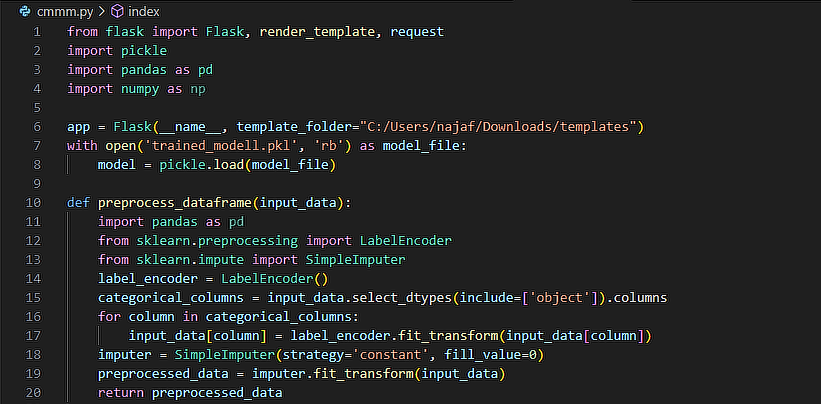

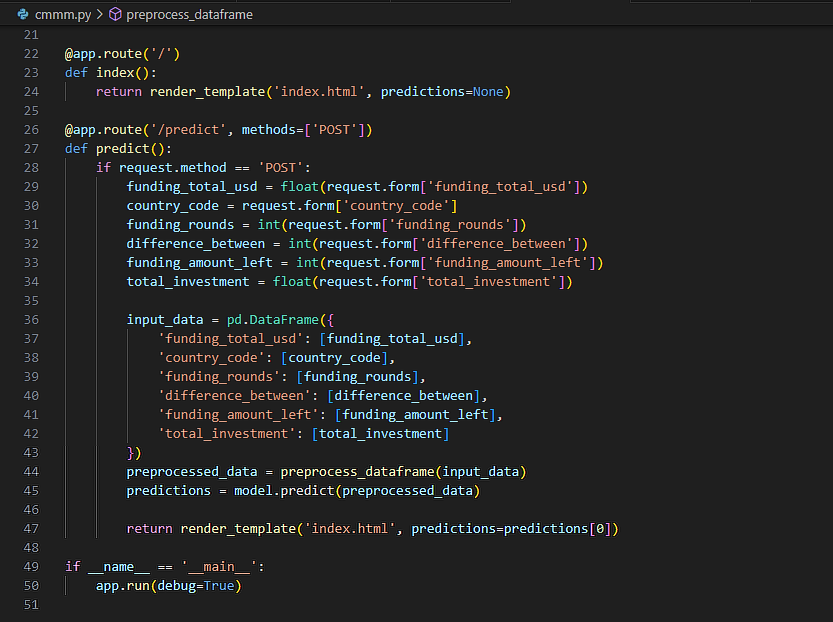

<U> HTML PAGE </U>

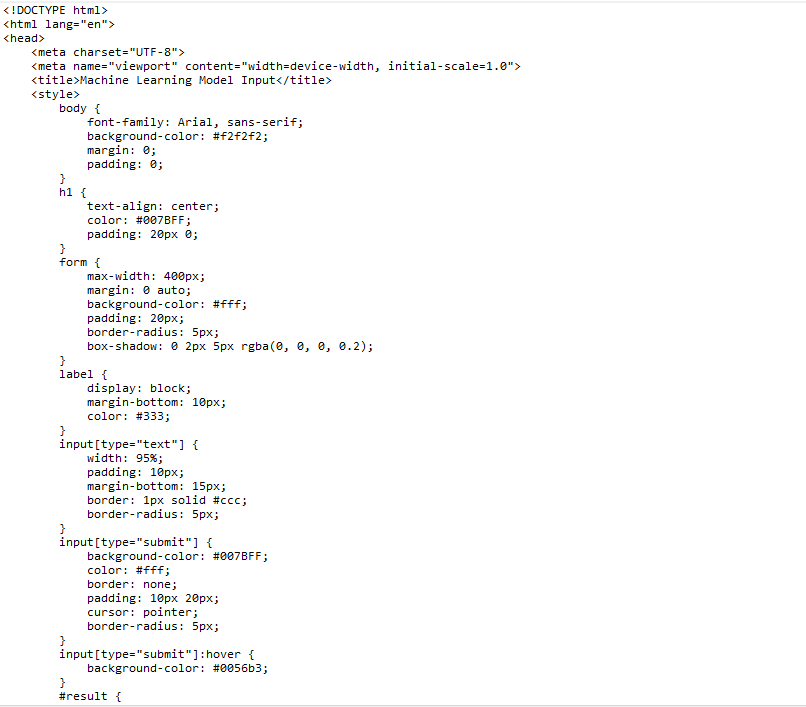

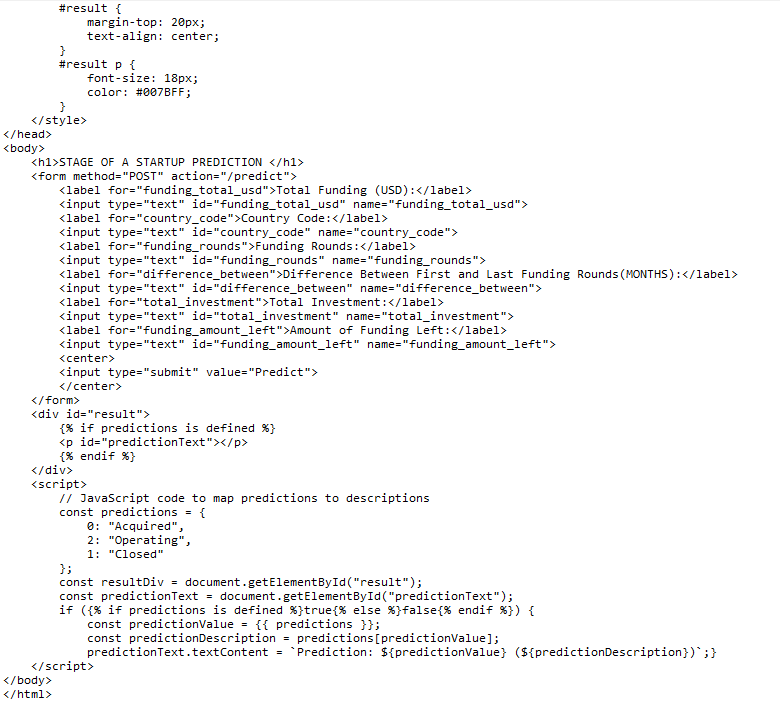

<U> OUTPUT </U>

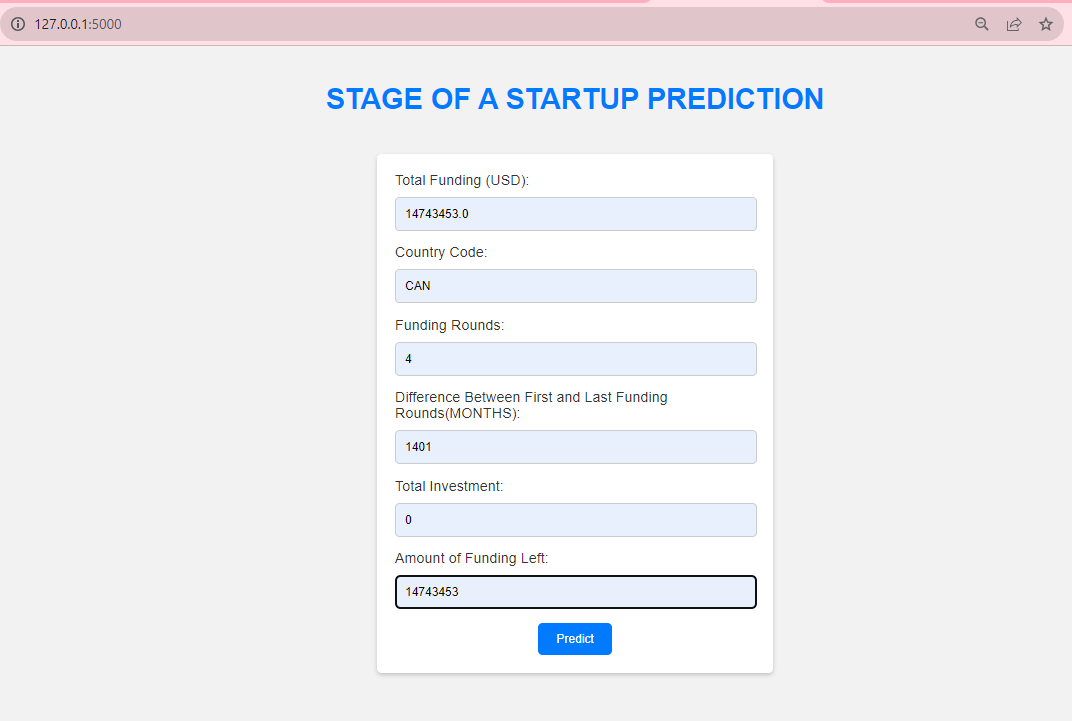

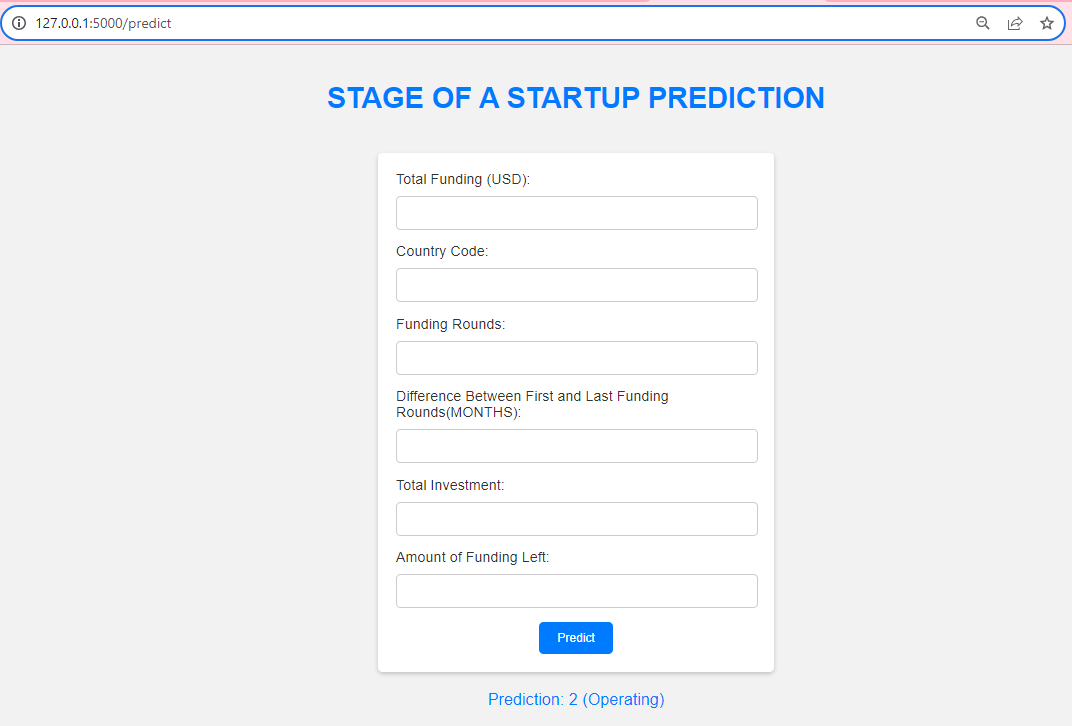